The impact of choosing the distance method on accuracy was tested using the KNN iris dataset.

In [1]:
# load iris dataset and print its description
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [2]:
# create a dataframe from the iris dataset
import pandas as pd 

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train-test split
X = iris.data 
y= iris.target

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state = 42)

# scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the model - euclidean distance
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')
knn.fit(X_train, y_train)


,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = knn.predict(X_test)
result = accuracy_score(y_test, y_pred)
print(f"accuracy: {result}")

confusion = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(confusion)

accuracy: 0.9777777777777777
confusion matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


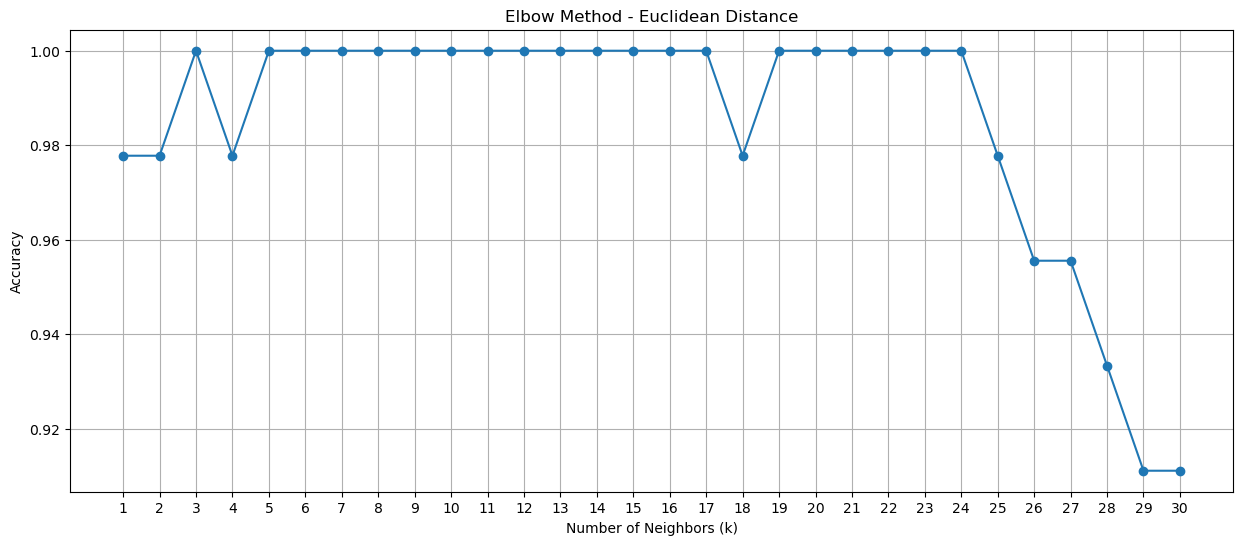

In [5]:
# Hyperparameter settings - elbow method
import matplotlib.pyplot as plt

accuracy_list = []
k_list = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    k_list.append(k)

plt.figure(figsize=(15,6))
plt.plot(k_list, accuracy_list, marker = 'o', linestyle = '-')
plt.title("Elbow Method - Euclidean Distance")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 31))
plt.grid()
plt.show()

In [6]:
# train the model - manhattan distance
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'manhattan')
knn.fit(X_train, y_train),

y_pred = knn.predict(X_test)
result = accuracy_score(y_test, y_pred)
print(f"accuracy with manhattan distance: {result}")

confusion = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(confusion)

accuracy with manhattan distance: 0.9333333333333333
confusion matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  3 10]]


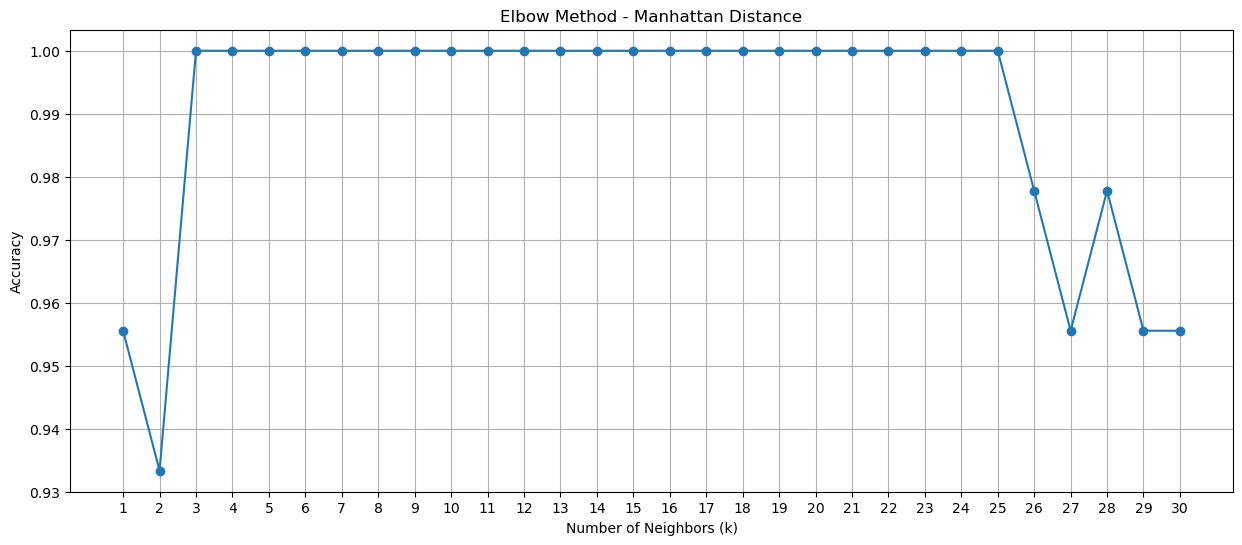

In [7]:
# Hyperparameter settings - elbow method
import matplotlib.pyplot as plt

accuracy_list = []
k_list = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    k_list.append(k)

plt.figure(figsize=(15,6))
plt.plot(k_list, accuracy_list, marker = 'o', linestyle = '-')
plt.title("Elbow Method - Manhattan Distance")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 31))
plt.grid()
plt.show()

In [8]:
# train the model - minkowski distance
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
result = accuracy_score(y_test, y_pred) 
print(f"accuracy with minkowski distance: {result}")

confusion = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(confusion)

accuracy with minkowski distance: 0.9777777777777777
confusion matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


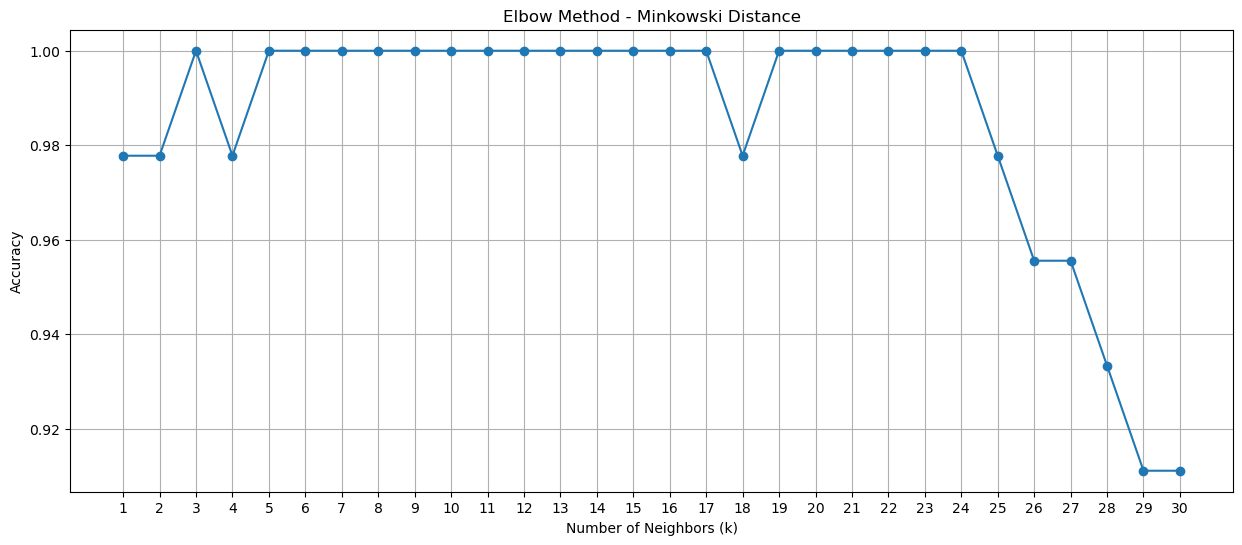

In [10]:
# Hyperparameter settings - elbow method
import matplotlib.pyplot as plt

accuracy_list = []
k_list = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    k_list.append(k)

plt.figure(figsize=(15,6))
plt.plot(k_list, accuracy_list, marker = 'o', linestyle = '-')
plt.title("Elbow Method - Minkowski Distance")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 31))
plt.grid()
plt.show()